In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches
from datetime import datetime, timedelta

In [2]:
def plot_pollutant(dates, X, category_limits, variable, yvariable, dates_limits, stations):

	fechas_datetime = [datetime.strptime(date, '%Y-%m-%d %H:%M') for date in dates]
	category_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']   
	colors = ['#9ACA3C', '#F7EC0F', '#F8991F', '#ED2124', '#7D287D', '#7E0023'] 
	colors = colors[0:len(category_limits)-1]
	category_labels = category_labels[0:len(category_limits)-1]
	fig, ax = plt.subplots(figsize=(16, 6))
	#variable = variable +' values'
	plot_colors = ['b','r','k','m', 'c', 'brown', 'purple', 'gray', 'pink', 'olive']
	for i in range(len(X)):
		ax.plot(fechas_datetime, X[i], marker = 'o', markersize=2, label=stations[i], linewidth=.6, color=plot_colors[i])
		
	for limit in category_limits:
		ax.axhline(y=limit, color='gray', linestyle='--', linewidth=0.4)

	for i in range(len(category_limits)-1):
		ax.axhspan(category_limits[i], category_limits[i + 1], color=colors[i], alpha=0.3)


	# Fix date format
	plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
	category_patches = [mpatches.Patch(color=colors[i], label=category_labels[i]) for i in range(len(colors))]

	# Turn the dates labels
	plt.gcf().autofmt_xdate()
	dates_labels = ["Before", "Cont.\nstarts", "Cont.\nends", "After Cont."]
	for idx,date in enumerate(dates_limits):
		plt.axvline(x=date, color='k', linestyle='--', linewidth=1, label="Vertical Line")
		plt.text(date, 190, dates_labels[idx], color='r', fontsize=12, verticalalignment='center', bbox={'facecolor':'white'})

	plt.xlabel('Timestamp (date, hour and minute)')
	yvariable ='Pollutant Value (' + yvariable+')'
	plt.ylabel(yvariable)
	title1 = variable + ' ​​before, during and after the contingency days'
	plt.title(title1)
	stations_label = [plt.Line2D([0], [0], color=plot_colors[i], marker='o', label=stations[i]) for i in range(len(stations))]
	#[plt.Line2D([0], [0], marker='o', label='MER')]+ [plt.Line2D([0], [0], marker='o', label='PED')]
	#plt.legend(handles=category_patches +stations_label , loc= 'upper right')
	# (1, 1)
	ax.legend(handles=category_patches +stations_label , loc="upper left", bbox_to_anchor=(1.05, 0.75))
	plt.grid(True)
	plt.show()

# Pipeline

## Subplots

In [3]:
def plot_values(df_bymonth, df_byhour, varXmonth, varXhour):
	fig, axes = plt.subplots(2, 3, figsize=(16, 5))
	axes[0, 0].scatter(df_bymonth[varXmonth],df_bymonth.O3)
	axes[0, 0].set_ylabel(r'O$_3$')
	axes[0, 0].set_xlabel("Month of the year")
	axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 1].scatter(df_bymonth[varXmonth],df_bymonth.TMP)
	axes[0, 1].set_ylabel("Temperature")
	axes[0, 1].set_xlabel("Month of the year")
	axes[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.O3, label=r'O$_3$', color='r')  
	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.TMP, label="Temperature", color='b')
	axes[0, 2].legend()  # Add legend
	axes[0, 2].set_ylabel("Values normalized")
	axes[0, 2].set_xlabel("Month of the year")

	axes[1, 0].scatter(df_byhour[varXhour],df_byhour.O3)
	axes[1, 0].set_ylabel(r'O$_3$')
	axes[1, 0].set_xlabel("Hour of the day")
	axes[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 1].scatter(df_byhour[varXhour],df_byhour.TMP)
	axes[1, 1].set_ylabel("Temperature")
	axes[1, 1].set_xlabel("Hour of the day")
	axes[1, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 2].plot(df_byhour[varXhour],df_byhour.O3, label=r'O$_3$', color='r') 
	axes[1, 2].plot(df_byhour[varXhour],df_byhour.TMP, label="Temperature", color='b') 
	axes[1, 2].legend()  # Add legend
	axes[1, 2].set_ylabel("Values normalized")
	axes[1, 2].set_xlabel("Hour of the day")
	axes[1, 2].grid(axis="y", linestyle="--", alpha=0.7)

	# Titles for each subplot (optional)
	axes[0, 0].set_title('Ozone vs month of the year 2024')
	axes[0, 1].set_title('Temperature vs month of the year 2024')
	axes[0, 2].set_title('Tmp&Ozone vs month of the year')
	axes[1, 0].set_title('Ozone vs hour of the day')
	axes[1, 1].set_title('Temperature vs hour of the day')

	plt.tight_layout()
	plt.show()

In [ ]:

fig, ax = plt.subplots(4,3)
fig.tight_layout(pad=1.4)
plt.subplots_adjust(left=0.13,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.90, 
                    wspace=0.3, 
                    hspace=0.7)

## we have 7 plots to create and
## we also want to delete the empty plot
## that would be in 8th position
variable = "O3"
a=0
fig, ax = plt.subplots()
stations = {0:"AJM", 1:"BJU"}
for i in range(4):
	for j in range(2):
		if a < 10 :
			yvariable = "ppm"
			station = stations[a]
			filepath = f"C:/Users/Valeria/Documents/CIC/air_pollution/graficas/{station}.csv"
			df = pd.read_csv(filepath)
			df['datetime_f']  = pd.to_datetime(df['datetime_f'] , format='%Y-%m-%d %H:%M:%S')
			df_fil = df[df.datetime_f >= date_prev]
			df_fil = df_fil[df_fil.datetime_f <= date_post]
			X = df_fil.O3
			dates = df_fil.datetime
			fechas_datetime = [datetime.strptime(date, '%Y-%m-%d %H:%M') for date in dates]
			category_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']   
			colors = ['#9ACA3C', '#F7EC0F', '#F8991F', '#ED2124', '#7D287D', '#7E0023'] 
			colors = colors[0:len(category_limits)-1]
			category_labels = category_labels[0:len(category_limits)-1]
			#plt.figure(figsize=(10, 6))
			#variable = variable +' values'
			ax.plot(fechas_datetime, X, markersize=2, label=variable, marker='o', linewidth=.3)
			#"""
			for limit in category_limits:
				#plt.axhline(y=limit, color='gray', linestyle='--', linewidth=0.8)
				ax.axhline(y=limit, color='gray', linestyle='--', linewidth=0.8)

				
			for i in range(len(category_limits)-1):
				#plt.axhspan(category_limits[i], category_limits[i + 1], color=colors[i], alpha=0.6)
				ax.axhspan(category_limits[i], category_limits[i + 1], color=colors[i], alpha=0.6)


			# Fix date format
			#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
			ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
			category_patches = [mpatches.Patch(color=colors[i], label=category_labels[i]) for i in range(len(colors))]

			# Turn the dates labels
			#plt.gcf().autofmt_xdate()
			fig.autofmt_xdate()
			dates_labels = ["Before", "Cont.\nstarts", "Cont.\nends", "After Cont."]
			for idx,date in enumerate(dates_limits):
				#plt.axvline(x=date, color='k', linestyle='--', linewidth=2, label="Vertical Line")
				#plt.text(date, 120, dates_labels[idx], color='r', fontsize=12, verticalalignment='center', bbox={'facecolor':'white'})
				ax.axvline(x=date, color='k', linestyle='--', linewidth=2, label="Vertical Line")
				ax.text(date, 120, dates_labels[idx], color='r', fontsize=12, verticalalignment='center', bbox={'facecolor': 'white'})


			#plt.xlabel('Timestamp (date, hour and minute)')
			ax.set_xlabel('Timestamp (date, hour and minute)')
			yvariable ='Pollutant Value (' + yvariable+')'
			ax.set_ylabel(yvariable)
			#plt.ylabel(yvariable)
			title1 = variable + ' ​​before, during and after the contingency days'
			ax.set_title(title1)
			ax.legend(handles=category_patches + [plt.Line2D([0], [0], marker='o', label='Values')], loc='upper right')
			ax.grid(True)
			#plt.title(title1)
			#plt.legend(handles=category_patches + [plt.Line2D([0], [0], marker='o', label='Values')], loc= 'upper right')
			#plt.grid(True)
			#plt.show()
			#"""
			#ax[i][j].set_xlabel(num_col[a], labelpad=0.5, fontsize = 10, loc='right')
			#ax[i][j].hist(df[num_col[a]],bins=30)
			a += 1
		else :
			plt.delaxes(ax[i, j])
            
## set an overall title
fig.suptitle('Variable distributions')
## set a single label for the y axes as they are all the same
fig.supylabel('Frequencies', fontsize=10)
plt.show()

## Loading air traffic MER data

In [15]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
#df['date'] = pd.to_datetime(df['date'])
#2005/01/01 00:00
#df["datetime"] = df["date"].astype(str)+ " " + df["hour"].astype(str) + ":" +df["minute"].astype(str) +"0:00"
df["datetime"] = df["date"].astype(str)+ " " + df["hour"].astype(str) + ":" +df["minute"].astype(str) +"0"
df["datetime_f"] = df["date"].astype(str)+ " " + df["hour"].astype(str) + ":" +df["minute"].astype(str) +"0:00"
#df["datetime"] = pd.to_datetime(df["datetime"], format='%Y-%m-%d %H:%M:%S')
df["datetime_f"] = pd.to_datetime(df["datetime_f"], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df = df.drop(columns=["year", "month", "day", "hour", "minute", "traffic", "date"])
df["latitude"] = 19.42461
df["longitude"] = -99.119594
df.head()

,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,datetime,datetime_f,latitude,longitude
0,0.62,2.0,32.0,30.0,110.0,46.0,26.0,7.0,2.0,26.0,293.0,2.1,2024-02-23 14:00,2024-02-23 14:00:00,19.42461,-99.119594
1,0.76,2.0,44.0,41.0,125.0,52.0,35.0,4.0,2.0,28.0,276.0,1.8,2024-02-23 15:00,2024-02-23 15:00:00,19.42461,-99.119594
2,0.56,1.0,32.0,31.0,133.0,56.0,39.0,2.0,2.0,29.0,39.0,2.1,2024-02-23 16:00,2024-02-23 16:00:00,19.42461,-99.119594
3,0.41,0.0,22.0,22.0,127.0,47.0,35.0,0.0,1.0,29.0,46.0,2.0,2024-02-23 17:00,2024-02-23 17:00:00,19.42461,-99.119594
4,0.33,2.0,17.0,15.0,55.0,25.0,17.0,6.0,0.0,27.0,56.0,2.3,2024-02-26 14:00,2024-02-26 14:00:00,19.42461,-99.119594


Create the files for each station

In [ ]:
"""
file_path = r"C:\Users\Valeria\Documents\CIC\air_pollution_data/pollution_all_stations_2005_2024.csv"
df  = pd.read_csv(file_path)
df["Datetime"] = df["Datetime"].str.replace("/", "-")
df.head()
pollutants = ["CO", "NO", "NOX", "NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP"]
estaciones = ["BJU", "MER", "PED", "CAM", "CCA", "UAX", "UIZ", "GAM", "TLA", "VIF", "ATI", "AJM", "SAC"] #  These are the stations that had turn on the env. contingency on 2024
estaciones = ["AJM", "BJU",  "CAM", "MER", "PED", "UAX", "UIZ", "TLA", "VIF", "SAC" ] #  From the stations above, this are the ones that we have traffic data
estaciones = ["CCA"]
for estacion in estaciones:
	columnas_interes = ["Datetime", "pollutant"]
	columnas_interes.append(estacion)
	datos_modelos = df[columnas_interes]
	datos_modelos = datos_modelos.rename(columns={estacion: "value"})
	dataframes = []
	for pollutant in pollutants:
		data = datos_modelos[datos_modelos.pollutant==pollutant]
		data = data.set_index("Datetime")
		data.index.name = 'date'
		data.drop('pollutant', axis=1, inplace=True)
		data = data.rename(columns={"value":pollutant})
		dataframes.append(data)
    
	
	df_merged = pd.DataFrame()
	columnas = ['date']
	df_merged = pd.DataFrame(columns=columnas)
	for dataframe in dataframes:
		df_merged = pd.merge(df_merged, dataframe, on='date', how='outer')

	df_merged = df_merged.reset_index()
	df_merged = df_merged.drop(columns=["index"])
	df_merged_sin_fecha = df_merged.drop(columns=["date"])
	indices_filas_vacias = df_merged_sin_fecha[df_merged_sin_fecha.isna().all(axis=1)].index
	df_filtrado = df_merged.drop(indices_filas_vacias)
	df_filtrado = df_filtrado.set_index("date")
	df_filtrado= df_filtrado.sort_values(by='date') 
	df_filtrado = df_filtrado.reset_index()
	try:
		df_filtrado['date'] = df_filtrado['date'].dt.strftime('%Y-%m-%d %H:%M')
	
	except:
		for i in range(len(df_filtrado)):
			try: 
				fecha = df_filtrado.iloc[i]['date']
				if type(fecha) == str: 
					if len(fecha) == 19:
						# Cambiar el formato de la fecha a 'YYYY/MM/DD HH:MM'
						fecha_dt = datetime.datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
						# Formatear la fecha al formato deseado (sin segundos)
						df_filtrado.iloc[i]['date'] = fecha_dt.strftime('%Y-%m-%d %H:%M')
					elif len(fecha) == 16:
						#Ya esta con el formato 'YYYY/MM/DD HH:MM'
						df_filtrado.iloc[i]['date'] = pd.to_datetime(fecha, format='%Y-%m-%d %H:%M')
			except Exception as e:
				print(e)
				print(i,  type(df_filtrado.iloc[i]['date']))
				print(df_filtrado.iloc[i])
	df_filtrado = df_filtrado.rename(columns={"date":"datetime"})
	df_filtrado["datetime_f"] = df_filtrado["datetime"].astype(str)+ ":00"
	df_filtrado["datetime_f"] = pd.to_datetime(df_filtrado["datetime_f"], errors='coerce', format='%Y-%m-%d %H:%M:%S')
	name = estacion+".csv"
	df_filtrado.to_csv(name, index=False)
"""

C:\Users\Valeria\AppData\Local\Temp\ipykernel_29744\1602168588.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.iloc[i]['date'] = pd.to_datetime(fecha, format='%Y-%m-%d %H:%M')


## Otra cosa 

In [ ]:
#"590620":"2024_Azcapotzalco",
#"593448":"2024_Iztapalapa",
221639131+51100000
51100000*100/322300000
# 272739131
32230000/365
# 88301 / 51100000


#"590620":"2024_Azcapotzalco",
#"593448":"2024_Iztapalapa",
221639131+51100000
# 272739131

88301.3698630137

## Loading one station

In [8]:
file_path = r"C:\Users\Valeria\Documents\CIC\air_pollution_data/pollution_all_stations_2005_2024.csv"
file_path = r"C:\Users\Valeria\Documents\CIC\air_pollution\graficas\MER.csv"
file_path = r'C:\Users\valer\Documents\CIC\doctorado\air_pollution\preprocessing_airpollution_data\datos_por_estacion_2005_dic2024\MER.csv'
df  = pd.read_csv(file_path)
#df['datetime_f']  = pd.to_datetime(df['datetime_f'] , format='%Y-%m-%d %H:%M:%S')
df['date']  = pd.to_datetime(df['date'] , format='%Y/%m/%d %H:%M', dayfirst=True)
df.head()

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP
0,2005-01-01 00:00:00,6.4,182.0,277.0,95.0,0.0,136.0,99.0,55.0,20.0,11.0,134.0,0.2
1,2005-01-01 01:00:00,4.2,107.0,193.0,85.0,0.0,158.0,114.0,55.0,20.0,10.0,NaN,NaN
2,2005-01-01 02:00:00,3.7,79.0,156.0,77.0,0.0,169.0,140.0,57.0,18.0,10.0,NaN,NaN
3,2005-01-01 03:00:00,3.5,80.0,148.0,68.0,0.0,161.0,137.0,58.0,17.0,9.0,NaN,NaN
4,2005-01-01 04:00:00,3.6,77.0,143.0,67.0,1.0,182.0,142.0,60.0,17.0,8.0,56.0,0.2


# Loading all the stations data

In [9]:
contingency_days = pd.read_csv(r"C:\Users\Valeria\Documents\contingencia_ambiental\contingency_days.csv", encoding="latin-1")
contingency_days.head(17)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Valeria\\Documents\\contingencia_ambiental\\contingency_days.csv'

2024-05-14 14:00:00 2024-05-26 18:00:00 Benito Juarez


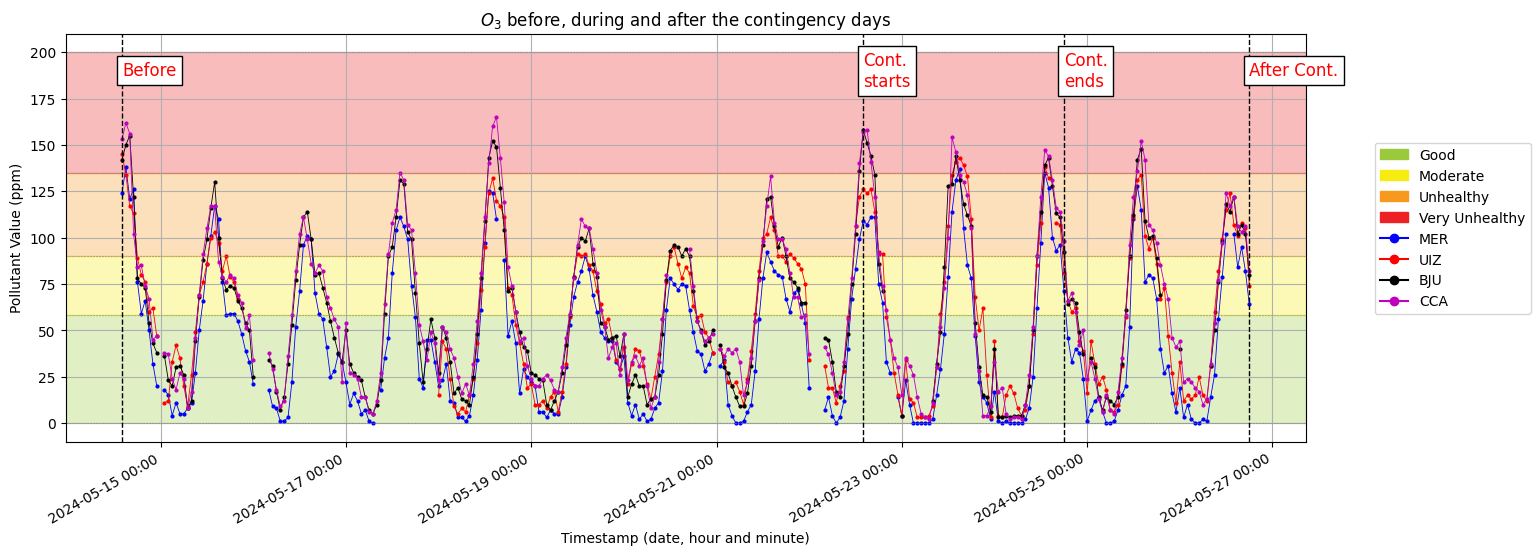

In [43]:
row = 5
date_in = contingency_days.iloc[row]["fecha_activacion"] + " " + contingency_days.iloc[row]["hora_inicio"]
date_end = contingency_days.iloc[row]["fecha_desactivacion"]  +  " " + contingency_days.iloc[row]["hora_levantamiento"]
date_in = datetime.strptime(date_in, "%d/%m/%Y %H:%M")
date_end = datetime.strptime(date_end, "%d/%m/%Y %H:%M")
num_days_before = 8
num_days_after = 2
date_prev = date_in - timedelta(days=num_days_before)
date_post = date_end + timedelta(days=num_days_after)
print(date_prev, date_post, contingency_days.iloc[row]["estacion_inicio"])
datetime_list = pd.date_range(date_prev, date_post, freq="h")  # Generate hourly datetimes
dates= [dt.strftime("%Y-%m-%d %H:%M") for dt in datetime_list]

stations = ["MER", "PED", "BJU", "CAM", "SAC", "TLA", "UAX", "UIZ", "VIF", "AJM"]
stations = ["MER", "UIZ", "BJU", "CCA"]
dfs = []
for station in stations:
	file_path = f"C:/Users/Valeria/Documents/CIC/air_pollution/graficas/{station}.csv"
	df  = pd.read_csv(file_path)
	df['datetime_f']  = pd.to_datetime(df['datetime_f'] , format='%Y-%m-%d %H:%M:%S')
	datetime_df = pd.DataFrame({"datetime_f": pd.to_datetime(datetime_list)})
	merged_df = datetime_df.merge(df, on="datetime_f", how="left")
	dfs.append(merged_df["O3"].tolist())

category_limits = [0, 58, 90, 135, 200]  #300
dates_limits = [date_prev, date_in, date_end, date_post]
plot_pollutant(dates, dfs, category_limits, r"$O_3$", "ppm", dates_limits, stations)


In [44]:
dates_limits =  [
    datetime(2024, 5, 15, 0, 0),
    datetime(2024, 5, 16, 0, 0),
    datetime(2024, 5, 21, 0, 0),
    datetime(2024, 5, 22, 0, 0),
    datetime(2024, 5, 23, 0, 0),
    datetime(2024, 5, 24, 0, 0),
    datetime(2024, 5, 25, 0, 0),
    datetime(2024, 5, 26, 0, 0),
]

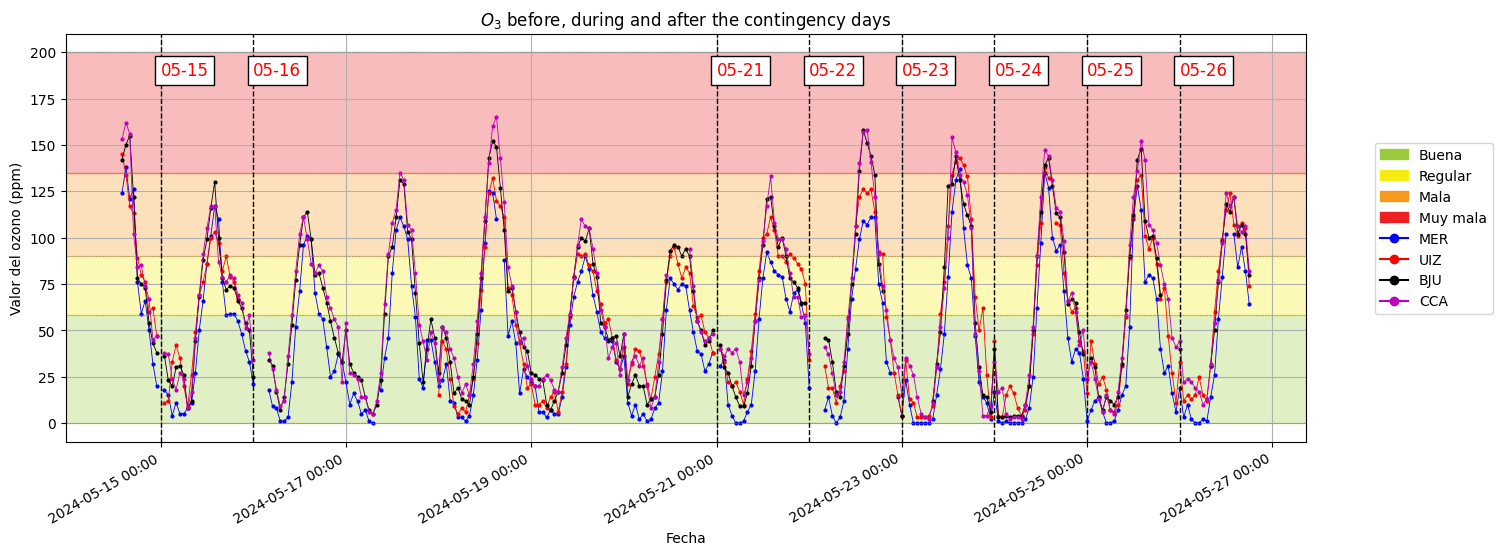

In [47]:
#def plot_pollutant(dates, X, category_limits, variable, yvariable, dates_limits, stations):
X = dfs
variable = r"$O_3$"
yvariable = "ppm"

#plot_pollutant(dates, dfs, category_limits, r"$O_3$", "ppm", dates_limits, stations)
fechas_datetime = [datetime.strptime(date, '%Y-%m-%d %H:%M') for date in dates]
category_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']   
category_labels = ['Buena', 'Regular', 'Mala', 'Muy mala', 'Extrem. mala']   
colors = ['#9ACA3C', '#F7EC0F', '#F8991F', '#ED2124', '#7D287D', '#7E0023'] 
colors = colors[0:len(category_limits)-1]
category_labels = category_labels[0:len(category_limits)-1]
fig, ax = plt.subplots(figsize=(16, 6))
#variable = variable +' values'
plot_colors = ['b','r','k','m', 'c', 'brown', 'purple', 'gray', 'pink', 'olive']
for i in range(len(X)):
	ax.plot(fechas_datetime, X[i], marker = 'o', markersize=2, label=stations[i], linewidth=.6, color=plot_colors[i])
	
for limit in category_limits:
	ax.axhline(y=limit, color='gray', linestyle='--', linewidth=0.4)

for i in range(len(category_limits)-1):
	ax.axhspan(category_limits[i], category_limits[i + 1], color=colors[i], alpha=0.3)


# Fix date format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
category_patches = [mpatches.Patch(color=colors[i], label=category_labels[i]) for i in range(len(colors))]

# Turn the dates labels
plt.gcf().autofmt_xdate()
dates_labels = ["Before", "Cont.\nstarts", "Cont.\nends", "After Cont."]
date
for idx,date in enumerate(dates_limits):
	plt.axvline(x=date, color='k', linestyle='--', linewidth=1, label="Vertical Line")
	#plt.text(date, 190, dates_labels[idx], color='r', fontsize=12, verticalalignment='center', bbox={'facecolor':'white'})
	plt.text(date, 190, str(date)[5:10], color='r', fontsize=12, verticalalignment='center', bbox={'facecolor':'white'})
#plt.xlabel('Timestamp (date, hour and minute)')
plt.xlabel('Fecha')
#yvariable ='Pollutant Value (' + yvariable+')'
yvariable ='Valor del ozono (' + yvariable+')'
plt.ylabel(yvariable)
title1 = variable + ' ​​before, during and after the contingency days'
plt.title(title1)
stations_label = [plt.Line2D([0], [0], color=plot_colors[i], marker='o', label=stations[i]) for i in range(len(stations))]
#[plt.Line2D([0], [0], marker='o', label='MER')]+ [plt.Line2D([0], [0], marker='o', label='PED')]
#plt.legend(handles=category_patches +stations_label , loc= 'upper right')
# (1, 1)
ax.legend(handles=category_patches +stations_label , loc="upper left", bbox_to_anchor=(1.05, 0.75))
plt.grid(True)
plt.show()

row 8
2024-03-22 16:00:00 2024-06-22 15:00:00 Atizapán / Cuautitlán / Villa de las Flores


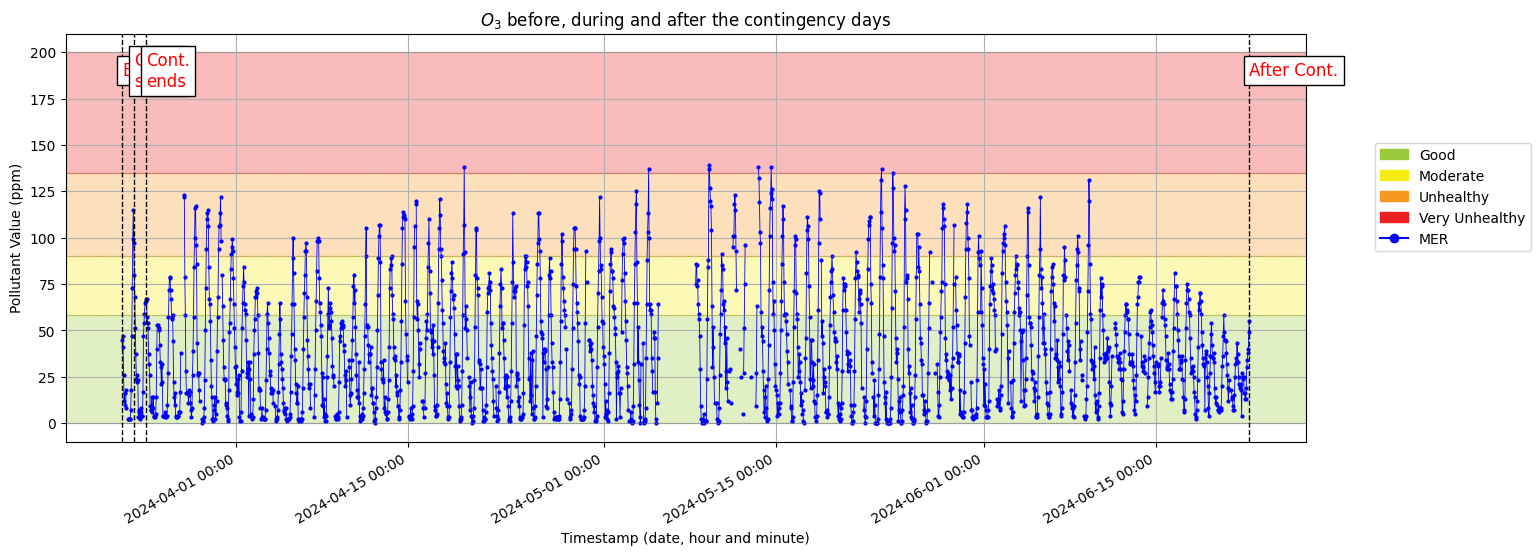

In [24]:
row = 8
print("row",row)
date_in = contingency_days.iloc[row]["fecha_activacion"] + " " + contingency_days.iloc[row]["hora_inicio"]
date_end = contingency_days.iloc[row]["fecha_desactivacion"]  +  " " + contingency_days.iloc[row]["hora_levantamiento"]
date_in = datetime.strptime(date_in, "%d/%m/%Y %H:%M")
date_end = datetime.strptime(date_end, "%d/%m/%Y %H:%M")
num_days_before = 1
num_days_after = 90
date_prev = date_in - timedelta(days=num_days_before)
date_post = date_end + timedelta(days=num_days_after)
print(date_prev, date_post, contingency_days.iloc[row]["estacion_inicio"])
datetime_list = pd.date_range(date_prev, date_post, freq="h")  # Generate hourly datetimes
dates= [dt.strftime("%Y-%m-%d %H:%M") for dt in datetime_list]

stations = ["MER", "PED", "BJU", "CAM", "SAC", "TLA", "UAX", "UIZ", "VIF", "AJM"]
stations = ["MER"]
dfs = []
for station in stations:
	file_path = f"C:/Users/Valeria/Documents/CIC/air_pollution/graficas/{station}.csv"
	df  = pd.read_csv(file_path)
	df['datetime_f']  = pd.to_datetime(df['datetime_f'] , format='%Y-%m-%d %H:%M:%S')
	datetime_df = pd.DataFrame({"datetime_f": pd.to_datetime(datetime_list)})
	merged_df = datetime_df.merge(df, on="datetime_f", how="left")
	dfs.append(merged_df["O3"].tolist())

category_limits = [0, 58, 90, 135, 200]  #300
dates_limits = [date_prev, date_in, date_end, date_post]
plot_pollutant(dates, dfs, category_limits, r"$O_3$", "ppm", dates_limits, stations)


2024-05-19 14:00:00 2024-05-25 02:00:00 Benito Juarez


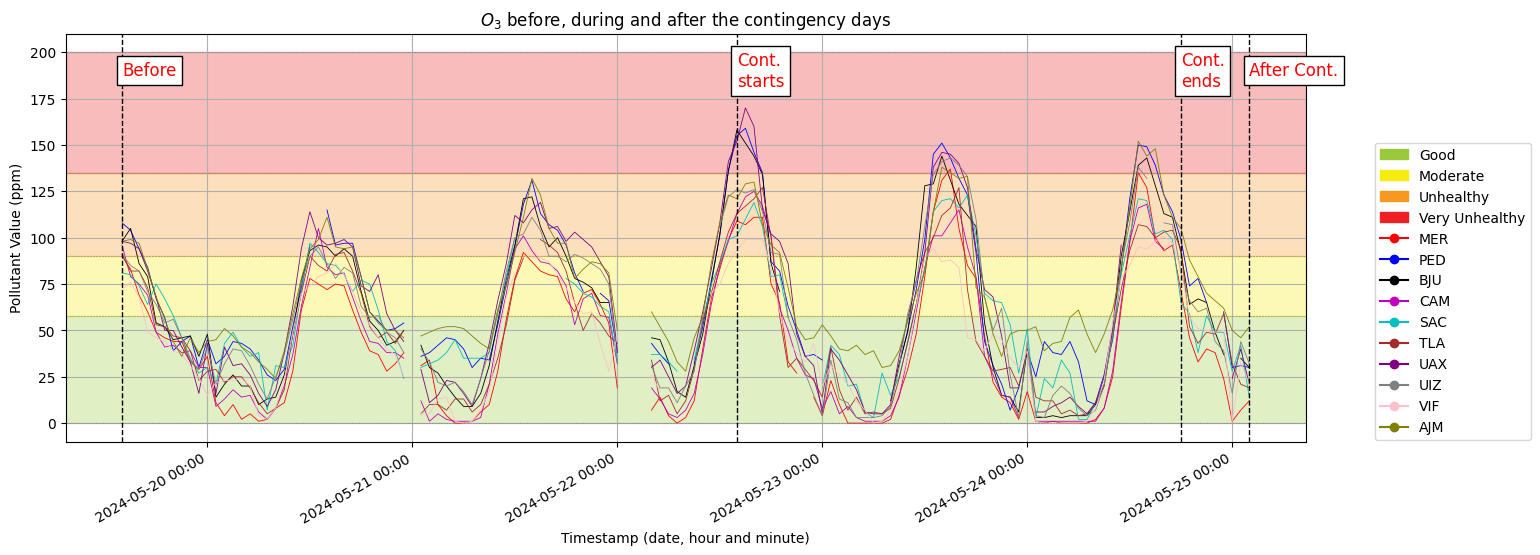

In [117]:
row = 2
date_in = contingency_days.iloc[row]["fecha_activacion"] + " " + contingency_days.iloc[row]["hora_inicio"]
date_end = contingency_days.iloc[row]["fecha_desactivacion"]  +  " " + contingency_days.iloc[row]["hora_levantamiento"]
date_in = datetime.strptime(date_in, "%d/%m/%Y %H:%M")
date_end = datetime.strptime(date_end, "%d/%m/%Y %H:%M")
num_days_before = 3
num_days_after = 8
date_prev = date_in - timedelta(days=num_days_before)
date_post = date_end + timedelta(hours=num_days_after)
print(date_prev, date_post, contingency_days.iloc[row]["estacion_inicio"])
datetime_list = pd.date_range(date_prev, date_post, freq="h")  # Generate hourly datetimes
dates= [dt.strftime("%Y-%m-%d %H:%M") for dt in datetime_list]

stations = ["MER", "PED", "BJU", "CAM", "SAC", "TLA", "UAX", "UIZ", "VIF", "AJM"]
#stations = ["MER"]
dfs = []
for station in stations:
	file_path = f"C:/Users/Valeria/Documents/CIC/air_pollution/graficas/{station}.csv"
	df  = pd.read_csv(file_path)
	df['datetime_f']  = pd.to_datetime(df['datetime_f'] , format='%Y-%m-%d %H:%M:%S')
	datetime_df = pd.DataFrame({"datetime_f": pd.to_datetime(datetime_list)})
	merged_df = datetime_df.merge(df, on="datetime_f", how="left")
	dfs.append(merged_df["O3"].tolist())

category_limits = [0, 58, 90, 135, 200]  #300
dates_limits = [date_prev, date_in, date_end, date_post]
plot_pollutant(dates, dfs, category_limits, r"$O_3$", "ppm", dates_limits, stations)

7 days before contingency:  2024-05-15 14:00:00
Date contingency started: 2024-05-22 14:00:00
Date contingency finished: 2024-05-24 18:00:00
7 days before contingency ended 2024-05-31 18:00:00


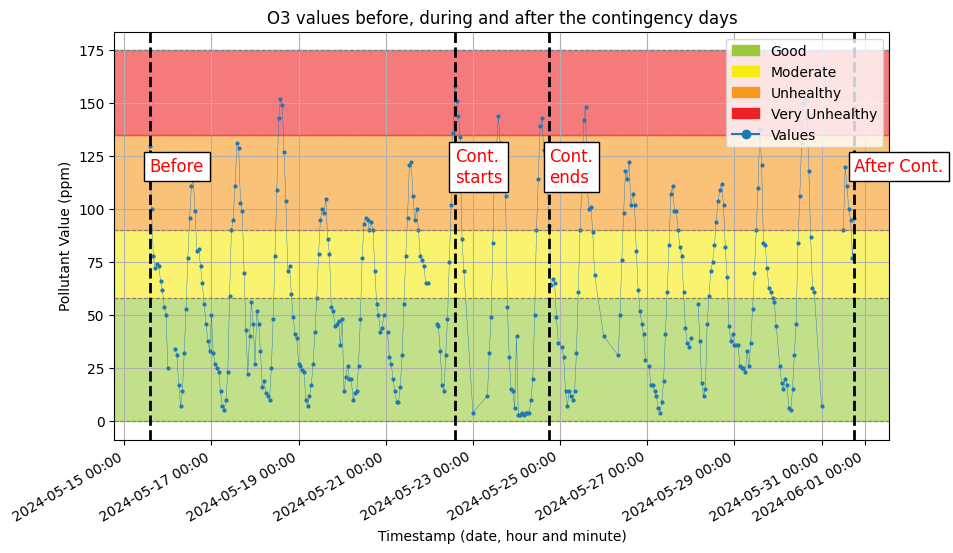

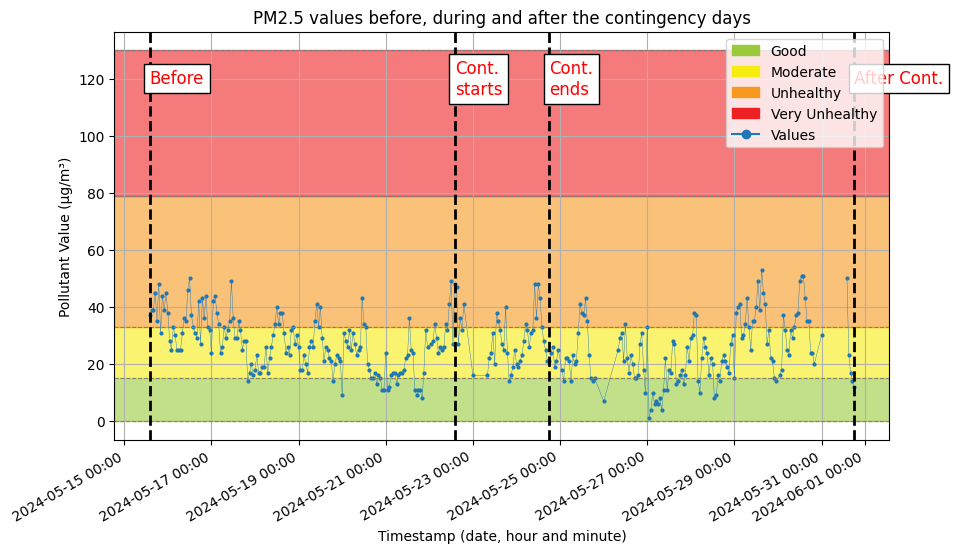

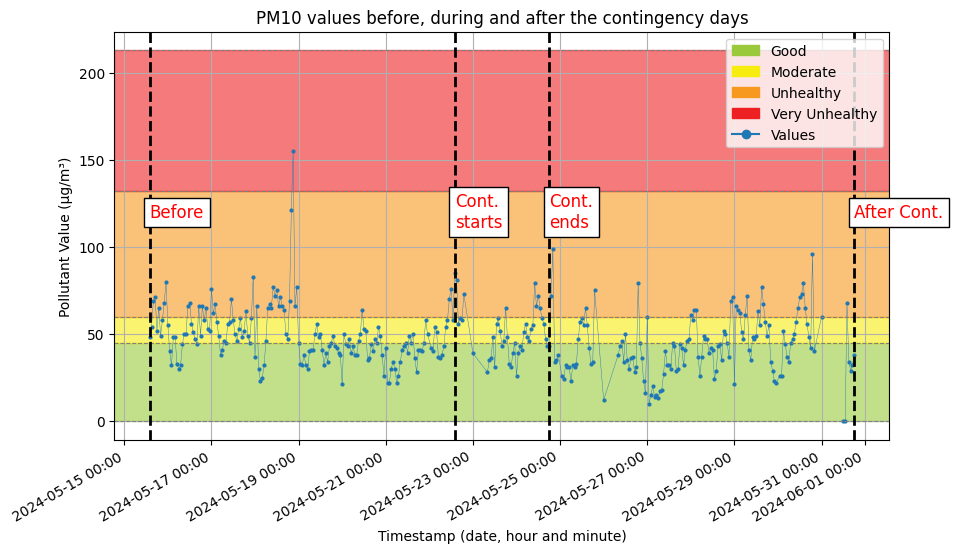

In [80]:
row = 2
date_in = contingency_days.iloc[row]["fecha_activacion"] + " " + contingency_days.iloc[row]["hora_inicio"]
date_end = contingency_days.iloc[row]["fecha_desactivacion"]  +  " " + contingency_days.iloc[row]["hora_levantamiento"]
date_in = datetime.strptime(date_in, "%d/%m/%Y %H:%M")
date_end = datetime.strptime(date_end, "%d/%m/%Y %H:%M")
num_days_before = 7
num_days_after = 7
date_prev = date_in - timedelta(days=num_days_before)
date_post = date_end + timedelta(days=num_days_after)
print(f"{num_days_before} days before contingency: ", date_prev)
print("Date contingency started:", date_in)
print("Date contingency finished:", date_end)
print(f"{num_days_after} days before contingency ended", date_post)
df_fil = df[df.datetime_f >= date_prev]
df_fil = df_fil[df_fil.datetime_f <= date_post]
category_limits = [0, 58, 90, 135, 175]  #300
dates_limits = [date_prev, date_in, date_end, date_post]
plot_pollutant(df_fil.datetime, df_fil.O3, category_limits, "O3", "ppm", dates_limits)
category_limits = [0, 15,33,79,130] # 450  
plot_pollutant(df_fil.datetime, df_fil.PM25, category_limits, "PM2.5", "µg/m³", dates_limits)
category_limits = [0, 45,60,132,213] #730  
plot_pollutant(df_fil.datetime, df_fil.PM10, category_limits, "PM10", "µg/m³", dates_limits)

